<a href="https://colab.research.google.com/github/dhilligo/PHYS633S22/blob/main/Hilligoss_Dylan_20_NuclearReactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="red">20-NuclearReactions </font>

In [43]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. At home: pp vs CNO rates

> **TODO**
> 1. Make a plot of $\log(\epsilon)$ as a function of $\log(T)$ for the PP-I chain and the CNO cycle, based on the expression given in class (from Kip 18.5.1). Use the temperature range already given in the code below.
>
> 2. In both cases (PP-I and CNO), by how much does the $\epsilon$ changes for a change of temperature of one order of magnitude?
>
>3. If you were to reproduce $\epsilon$ in the range of temperature below by a power law of the form $\epsilon \propto T^\nu$, what would the index $\nu$ of the power law be? (Graph a curve to find your answer.)

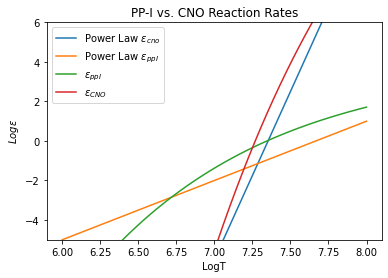

In [44]:
fig, ax = plt.subplots(1,1)
ax.set_ylim(-5,6)

logT = np.linspace(6,8,50)
T6=(10**logT)/(10**6)
T=10**(logT)
#########################
# At home
g_pp1=1+0.0123*(T6**(1/3))+0.0109*(T6**(2/3))+0.0009*T6
eps_pp1=(2.38*10**6)*g_pp1*1*((0.7)**2)*(T6**(-2/3))*np.exp(-33.8/(T6**(1/3)))
#eps_pp1
g_cno=1+0.0027*(T6**(1/3))-0.00778*(T6**(2/3))-0.000149*T6
eps_cno=(8.67*10**27)*g_cno*1*1*0.01*(T6**(-2/3))*np.exp(-152.83/((T6**(1/3))))


###eps=(T)**0.3

ax.plot(logT,np.log10((10**logT)**17)-125,label=r'Power Law $\epsilon_{cno}$')
ax.plot(logT,np.log10((10**logT)**3)-23,label=r'Power Law $\epsilon_{ppI}$')
ax.plot(logT,np.log10(eps_pp1),label=r'$\epsilon_{ppI}$')
ax.plot(logT,np.log10(eps_cno),label=r'$\epsilon_{CNO}$')
ax.set_xlabel("LogT")
ax.set_ylabel(r"$Log\epsilon$")
ax.set_title("PP-I vs. CNO Reaction Rates")
ax.legend(loc='best')

> **TODO**: Write a caption for your graph, and answer the questions asked.

***ANSWER***: This plot shows the nuclear reaction rates for the pp-I and CNO cycle as a function of temperature. The green and purple curves show the nuclear reaction rates for these two methods by using the two numerical equations provided in lecture. The blue and orange curves show the reaction rates if a power law was used. For the Power Law $\epsilon_{cno}$ curve, the power index used was 17. This was found by taking the slope of the $\epsilon_{cno}$ curve. Essentially, I found $Δ log(\epsilon_{cno})/Δlog(T)$ to be approximately 17. Using a similar procedure for the $\epsilon_{pp-I}$ curve, I found the power index to be approximately 3. Essentially, $Δ log(\epsilon_{pp-I})/Δlog(T)=3$.

## 2. Let's look at the energy generation in our MESA models



### Reading in the models

First, use the cell below to read in the two MESA models from the convection notebook for the Sun (in variable `Msun`) and for a 10 $M_\odot$ star (in variable `M10`). 

In [45]:
def read_model(file):

    return np.genfromtxt(file, skip_header=5, names=True)

Msun = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data')
M10 = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-M10-profile8.data')

### 1. In class: we will look at the energy generation in the Solar model.

In MESA, the column named `eps_nuc` gives the total power per gram coming from all of the nuclear reactions. The columns `pp` and `cno` give the power/g coming from the PP (I, II, and III) chains and the CNO cycle, respectively. 

We will make a gapph of $\epsilon_\mathrm{nuc}$, $\epsilon_\mathrm{pp}$ and $\epsilon_\mathrm{cno}$ as a function of radius. 

### At home:

> **TODO** 
>
> 1. Make a similar plot for the 10$M_\odot$ model. In the interpretation box below, comment on the similarities/differences between the two models.
>
> 2. Use the analytical expression for $\epsilon_\mathrm{pp-1}$ and $\epsilon_\mathrm{cno}$ from Part 1 to calculate your expected values for $\epsilon_\mathrm{pp-1}$ and $\epsilon_\mathrm{cno}$ in both models, and add these curves to your plots. In the MESA model, you will some useful columns such as:
>    * 'logRho' for the logarithm10 of the density in g/cm$^2$
>    * 'logT' for the logarithm10 of the temperature in K
>    * 'h1' for the mass fraction of hydrogen
>    * 'c12', 'n14', 'o16','o18' for the mass fraction of important isotopes of carbon, nitrogen, and oxygen.
>
> 3. In the interpretation box below, compare your calculation in #2 to the real $\epsilon$s in the models. If there are any differences, comment on what could explain these discrepencies. 

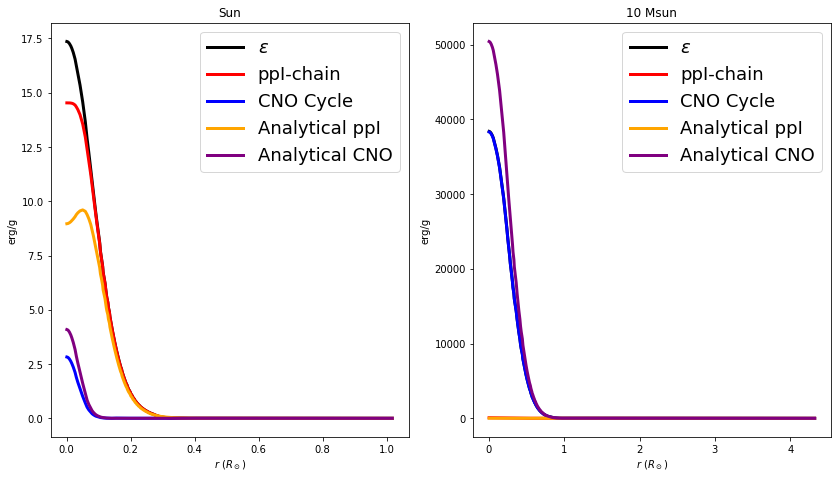

In [46]:
fig, ax = plt.subplots(1,2, figsize=(12,7))

ax[0].set_title('Sun')
ax[1].set_title('10 Msun')

ax[0].set_xlabel('$r$ ($R_\odot$)')
ax[1].set_xlabel('$r$ ($R_\odot$)')

ax[0].set_ylabel('erg/g')
ax[1].set_ylabel('erg/g')

plt.rcParams.update({'font.size': 18})
plt.tight_layout()

T61=((10**Msun['logT'])/10**6)
#T=10**Msun['logT']
#########################
# In class
g_pp1=1+0.0123*(T61**(1/3))+0.0109*(T61**(2/3))+0.0009*T61
eps_pp1=(2.38*10**6)*g_pp1*(10**Msun['logRho'])*(Msun['h1']**2)*(T61**(-2/3))*np.exp(-33.8/(T61**(1/3)))

g_cno1=1+0.0027*(T61**(1/3))-0.00778*(T61**(2/3))-0.000149*T61
eps_cno1=(8.67*10**27)*g_cno1*(10**Msun['logRho'])*(Msun['h1'])*(Msun['c12']+Msun['n14']+Msun['o16']+Msun['o18'])*(T61**(-2/3))*np.exp(-152.83/((T61**(1/3))))

ax[0].plot(10**Msun['logR'],Msun['eps_nuc'],c='k', lw=3, label='$\epsilon$')
ax[0].plot(10**Msun['logR'],Msun['pp'],c='red', lw=3, label='ppI-chain')
ax[0].plot(10**Msun['logR'],Msun['cno'],c='blue', lw=3, label='CNO Cycle')
ax[0].plot(10**Msun['logR'],eps_pp1,c='orange',lw=3,label='Analytical ppI')
ax[0].plot(10**Msun['logR'],eps_cno1,c='purple',lw=3,label='Analytical CNO')
ax[0].legend(loc='best')
#########################
# At home
T610=((10**M10['logT'])/10**6)

g_pp10=1+0.0123*(T610**(1/3))+0.0109*(T610**(2/3))+0.0009*T610
eps_pp10=(2.38*10**6)*g_pp10*(10**M10['logRho'])*(M10['h1']**2)*(T610**(-2/3))*np.exp(-33.8/(T610**(1/3)))

g_cno10=1+0.0027*(T610**(1/3))-0.00778*(T610**(2/3))-0.000149*T610
eps_cno10=(8.67*10**27)*g_cno10*(10**M10['logRho'])*(M10['h1'])*(M10['c12']+M10['n14']+M10['o16']+M10['o18'])*(T610**(-2/3))*np.exp(-152.83/((T610**(1/3))))

ax[1].plot(10**M10['logR'],M10['eps_nuc'],c='k', lw=3, label='$\epsilon$')
ax[1].plot(10**M10['logR'],M10['pp'],c='red', lw=3, label='ppI-chain')
ax[1].plot(10**M10['logR'],M10['cno'],c='blue', lw=3, label='CNO Cycle')
ax[1].plot(10**M10['logR'],eps_pp10,c='orange',lw=3,label='Analytical ppI')
ax[1].plot(10**M10['logR'],eps_cno10,c='purple',lw=3,label='Analytical CNO')
ax[1].legend(loc='best')



> **TODO** Write a caption for your graph, and answer the questions asked. 

***ANSWER***: The following figure table shows the nuclear reaction rates of various processes for a $1M_\odot$ and $10M_\odot$ model. Specifically, each model examines the overall nuclear reaction rate as well as the pp-1 chain and CNO cycle energy generation rates. While both graphs contain a similar curve structure, the $1M_\odot$ is primarily dominated by the pp-1 chain while the CNO cylce overwhelmingly powers the $10M_\odot$ model. The scales are vastly different as well implying that the $10M_\odot$ model burns through its store of energy on a much faster timescale than the $1M_\odot$ model.

We also compared the model values to the analytical values. While the analytical values are similar, they do not exactly line up in the $1M_\odot$ model values. This most likely due to the fact that the pp-1 chain and CNO cycle do not account for 100% of the energy generation. For example, there are also pp-II and pp-III chain reactions occuring within the core.

In the $10M_\odot$ model, the analytical CNO cycle solution matches the total nuclear reaction rate exactly. However, they do not match with the model values. This could be due to the fact that there are are energy generation processes occuring as well. The values for the analytical and model pp-1 chain also match up at 0 erg/g as well. It seems that more massive stars do not rely on the pp-1 chain at all.

This analysis further emphasizes how important mass is to the nuclear processes occuring within a star.